In [1]:
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio

import matplotlib.pyplot as plt
%matplotlib inline

## 単純なNMFによるドラム分解
sklearnにあるやん
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

librosaにもあるやん
http://makotomurakami.com/blog/2020/06/22/5899/

↑
なかではsklearn呼び出してるだけやないかい

### データの読み込み

In [2]:
y,sr=librosa.load('../data/drums.wav')
D = librosa.stft(y)  # STFT
S, phase = librosa.magphase(D)  # 複素数を強度と位相へ変換
Sdb = librosa.amplitude_to_db(S)  # 強度をdb単位へ変換

### Sdbに対してNMFをかける

In [3]:
matrix_fc, matrix_ct = librosa.decompose.decompose(S, n_components=5, sort=True)

/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


/opt/conda/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


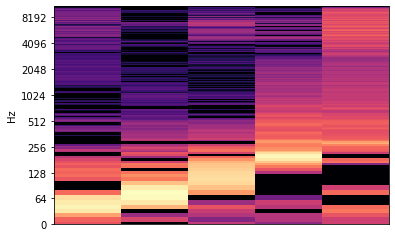

In [4]:
librosa.display.specshow(
    librosa.amplitude_to_db(matrix_fc, ref=np.max),
    y_axis='log')

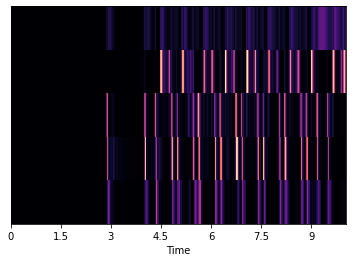

In [5]:
librosa.display.specshow(matrix_ct[:, 0:int(10/0.023138832997987926)], x_axis='time')

In [6]:
matrix_1basis=np.zeros_like(matrix_ct)
matrix_1basis[3]=matrix_ct[3] #スネア？

In [7]:
# reconstructed_amplitude = matrix_fc.dot(matrix_ct)
reconstructed_amplitude = matrix_fc.dot(matrix_1basis)

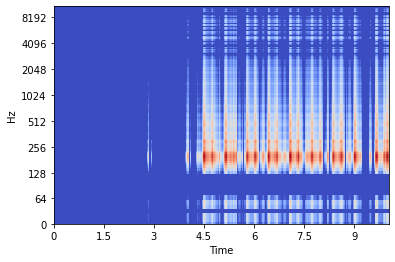

In [8]:
librosa.display.specshow(
    librosa.amplitude_to_db(
        reconstructed_amplitude[:, 0:int(10/0.023138832997987926)], 
    ), 
    y_axis='log', 
    x_axis='time')

In [9]:
tmp=librosa.griffinlim(
    reconstructed_amplitude[:, 0:int(10/0.023138832997987926)]
)  #位相推定付きフーリエ逆変換

In [ ]:
Audio(tmp,rate=sr) # 

In [11]:
matrix_1basis=np.zeros_like(matrix_ct)
matrix_1basis[2]=matrix_ct[2] #バス

In [12]:
# reconstructed_amplitude = matrix_fc.dot(matrix_ct)
reconstructed_amplitude = matrix_fc.dot(matrix_1basis)

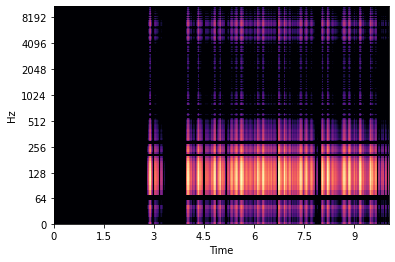

In [13]:
librosa.display.specshow(
    librosa.amplitude_to_db(
        reconstructed_amplitude[:, 0:int(10/0.023138832997987926)], 
    ), 
    y_axis='log', 
    x_axis='time')

In [14]:
tmp=librosa.griffinlim(
    reconstructed_amplitude[:, 0:int(10/0.023138832997987926)]
)  #位相推定付きフーリエ逆変換

In [ ]:
Audio(tmp,rate=sr) # 

In [16]:
matrix_1basis=np.zeros_like(matrix_ct)
matrix_1basis[4]=matrix_ct[4] #HH ?

In [17]:
# reconstructed_amplitude = matrix_fc.dot(matrix_ct)
reconstructed_amplitude = matrix_fc.dot(matrix_1basis)

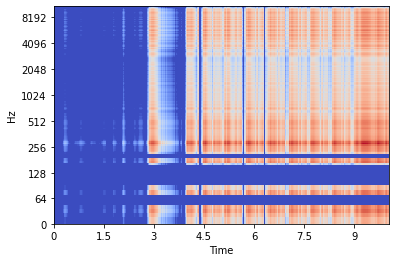

In [18]:
librosa.display.specshow(
    librosa.amplitude_to_db(
        reconstructed_amplitude[:, 0:int(10/0.023138832997987926)], 
    ), 
    y_axis='log', 
    x_axis='time')

In [19]:
tmp=librosa.griffinlim(
    reconstructed_amplitude[:, 0:int(10/0.023138832997987926)]
)  #位相推定付きフーリエ逆変換

In [ ]:
Audio(tmp,rate=sr) # 